Based on https://husson.github.io/img/transp_plan_con4.pdf
# Imports

In [1]:
# install.packages("rsm")
library(rsm)

Warning message:
"package 'rsm' was built under R version 3.5.3"


# Central composite design

In [2]:
plan <- ccd(2)

In [3]:
plan

run.order,std.order,x1,x2,Block
<int>,<int>,<dbl>,<dbl>,<fct>
1,7,0.000000,0.000000,1
2,6,0.000000,0.000000,1
3,1,-1.000000,-1.000000,1
4,8,0.000000,0.000000,1
5,4,1.000000,1.000000,1
6,5,0.000000,0.000000,1
7,2,1.000000,-1.000000,1
8,3,-1.000000,1.000000,1
1,3,0.000000,-1.414214,2


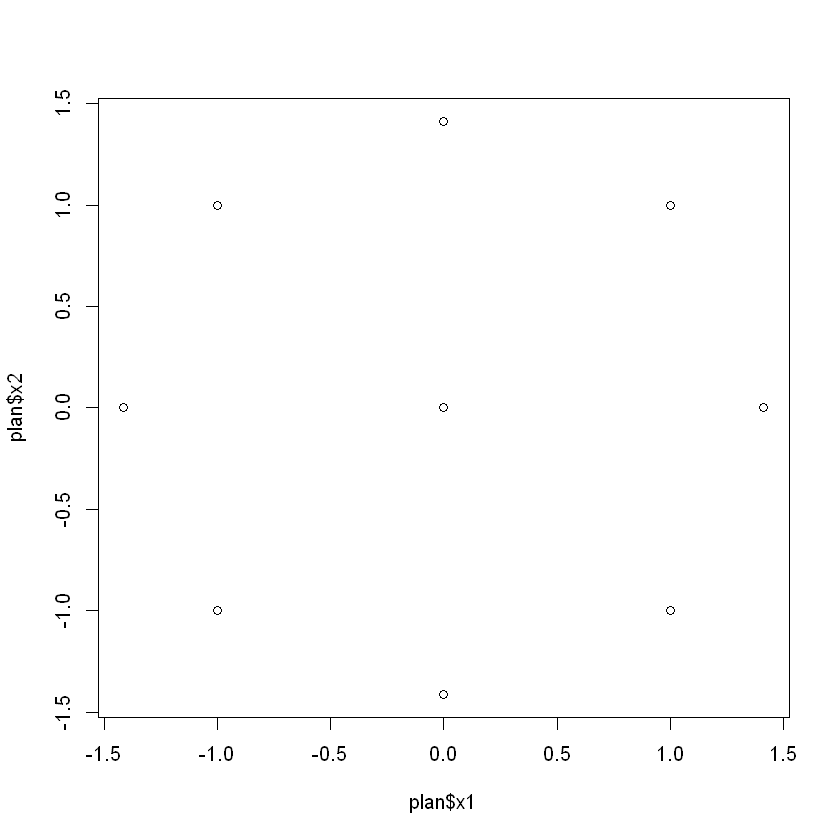

In [4]:
plot(plan$x1, plan$x2)

In [5]:
X <- model.matrix(~x1+x2+I(x1^2)+I(x2^2)+I(x1*x2), data=plan)

In [6]:
t(X)%*%X

,(Intercept),x1,x2,I(x1^2),I(x2^2),I(x1 * x2)
(Intercept),16,0,0,8,8,0
x1,0,8,0,0,0,0
x2,0,0,8,0,0,0
I(x1^2),8,0,0,12,4,0
I(x2^2),8,0,0,4,12,0
I(x1 * x2),0,0,0,0,0,4


In [7]:
solve(t(X)%*%X)

,(Intercept),x1,x2,I(x1^2),I(x2^2),I(x1 * x2)
(Intercept),0.1250,0.000,0.000,-0.0625,-0.0625,0.00
x1,0.0000,0.125,0.000,0.0000,0.0000,0.00
x2,0.0000,0.000,0.125,0.0000,0.0000,0.00
I(x1^2),-0.0625,0.000,0.000,0.1250,0.0000,0.00
I(x2^2),-0.0625,0.000,0.000,0.0000,0.1250,0.00
I(x1 * x2),0.0000,0.000,0.000,0.0000,0.0000,0.25


In [8]:
set.seed(1234)
Y <- c(1,5,4,7,8,8,4,5,2,5,4,5,5,9,7,5)
CR.rsm <- rsm(Y~SO(x1, x2), data=plan)
summary(CR.rsm)


Call:
rsm(formula = Y ~ SO(x1, x2), data = plan)

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  5.25000    0.65626  7.9999 1.178e-05 ***
x1           1.08211    0.65626  1.6489    0.1302    
x2           1.15533    0.65626  1.7605    0.1088    
x1:x2        0.75000    0.92809  0.8081    0.4378    
x1^2         0.87500    0.65626  1.3333    0.2120    
x2^2        -0.87500    0.65626 -1.3333    0.2120    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Multiple R-squared:  0.5007,	Adjusted R-squared:  0.251 
F-statistic: 2.005 on 5 and 10 DF,  p-value: 0.1633

Analysis of Variance Table

Response: Y
            Df Sum Sq Mean Sq F value Pr(>F)
FO(x1, x2)   2 20.046 10.0230  2.9091 0.1010
TWI(x1, x2)  1  2.250  2.2500  0.6530 0.4378
PQ(x1, x2)   2 12.250  6.1250  1.7777 0.2185
Residuals   10 34.454  3.4454               
Lack of fit  3  0.954  0.3180  0.0665 0.9760
Pure error   7 33.500  4.7857               

Stationary point of response surface:

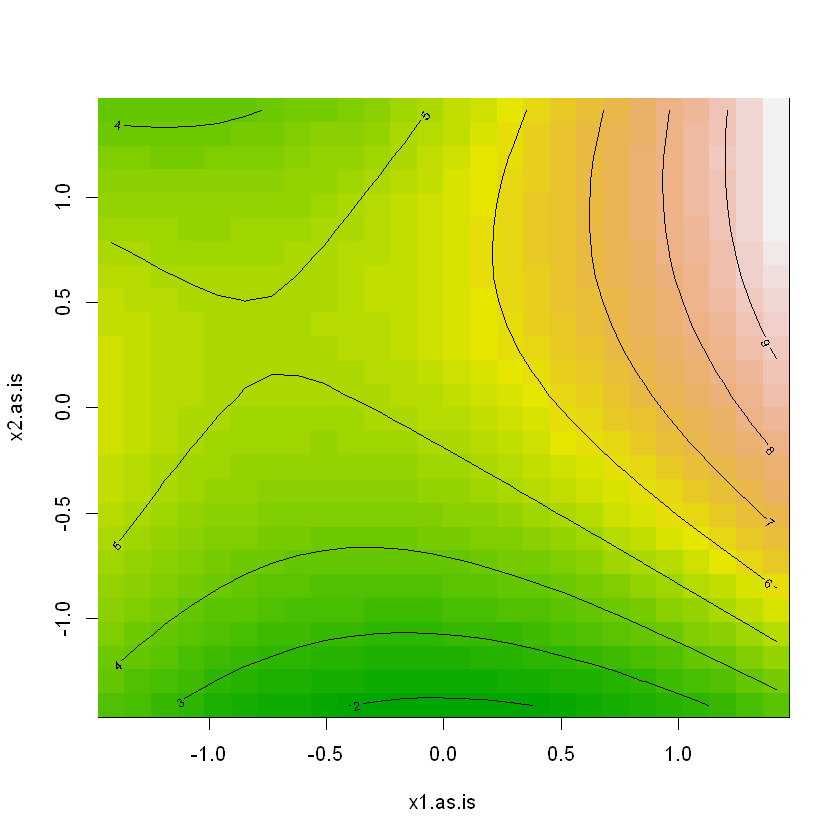

In [9]:
contour(CR.rsm, ~x1+x2, image=TRUE)

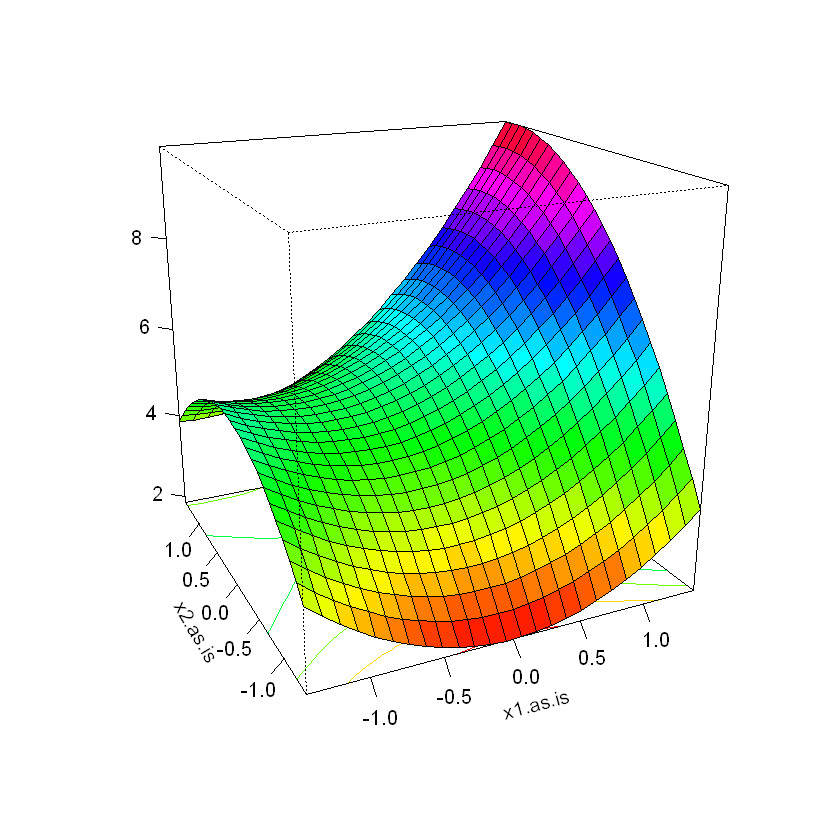

In [10]:
persp(CR.rsm, ~x1+x2, col=rainbow(50), contours="colors")

# Box-Benhken design

In [11]:
benhken <- bbd(3)

In [12]:
benhken

,run.order,std.order,x1,x2,x3
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,7,-1,0,1
2,2,1,-1,-1,0
3,3,8,1,0,1
4,4,10,0,1,-1
5,5,11,0,-1,1
6,6,9,0,-1,-1
7,7,16,0,0,0
8,8,6,1,0,-1
9,9,3,-1,1,0


In [13]:
# install.packages("rgl")
# install.packages("car")

library(car)
library(rgl)

Warning message:
"package 'car' was built under R version 3.5.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 3.5.3"
Warning message:
"package 'rgl' was built under R version 3.5.3"


In [15]:
# scatter3d(benhken$x1, benhken$x2, benhken$x3)

In [14]:
# plot3d(benhken$x1, benhken$x2, benhken$x3)